### ImageNet Example

Let's look at how the API is used by importing a simple pretrained imagenet model and testing it out on a picture of a dog.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Start by importing the image:

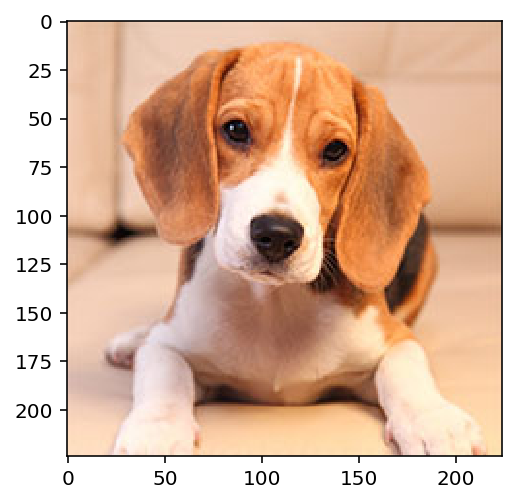

In [3]:
dog_img = plt.imread('dog.jpg')
plt.imshow(dog_img)
plt.show()

Now we'll import our model-getter from the zoo, as well as the `decode_predictions` tool which will convert our indexes to labels

In [4]:
from tfmodelzoo import ResNet50, decode_predictions

Create a session and pass it to our model getter. This will download the weights and return two tensors: the input and the output of the model

In [5]:
sess = tf.Session()
data, softmax = ResNet50(sess, weights='imagenet')

102858752/102853048 [==============================] - 36s 0us/step


In [6]:
data, softmax

(<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'fc1000/Softmax:0' shape=(?, 1000) dtype=float32>)

We can now go ahead and use these models in TensorFlow, adding more operations or simply running them. I'll put my dog through the model and see how it does:

In [7]:
predictions = sess.run(softmax, {data: np.array([dog_img])})

In [8]:
print('Top 10 Predictions w/ Confidence:')
for i, tup in enumerate(decode_predictions(predictions, top=10)[0]):
    print("{}\t— {}".format(tup[2], tup[1]))

Top 10 Predictions w/ Confidence:
0.8906792998313904	— beagle
0.061354268342256546	— Weimaraner
0.012612144462764263	— EntleBucher
0.010248360224068165	— Walker_hound
0.006116565316915512	— English_foxhound
0.004969390109181404	— bluetick
0.0017149088671430945	— redbone
0.001614996581338346	— Labrador_retriever
0.0015570599352940917	— basset
0.0012122730258852243	— dalmatian


It works! 🎉